In [1]:
import torch
import pandas as pd
import numpy as np      
from torch.utils.data import Dataset
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from  tqdm import tqdm

In [2]:
import mnist_load_main
from model import LeNet
from eval_model import evaluate_model
from train import Trainer

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
train,test=mnist_load_main.get_x_and_y()

In [4]:
model=LeNet()

In [5]:
batch_size=32
learning_rate=0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epoches=20

In [6]:
# train=Trainer(model, train, criterion, optimizer, epoches, 10)
# train.training()
# torch.save(model,'Lenet_model_1')

In [7]:
model = torch.load('Lenet_model_1')
model.eval()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [8]:
result=evaluate_model(model,test)
baseline=result.evaluate()

In [9]:
baseline

97.06970697069707

# explanation

## plotting

In [10]:
import shap

In [11]:
check_label= lambda image : np.argmax(model(torch.tensor((image)).float()).detach().numpy())  

In [176]:
sample_images,labels= next(iter(test))

In [178]:
sample_images,labels

(tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 tensor([2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4,
         0, 7, 4, 0, 1, 3, 1, 3]))

In [184]:
sample_images=sample_images[0]
sample_images=sample_images.reshape(-1,1,28,28)

In [185]:
sample_images.shape

torch.Size([1, 1, 28, 28])

In [172]:
background = train.dataset.x[np.random.choice(train.dataset.x.shape[0], 100, replace=False)].reshape(-1,1,28,28)
background=torch.tensor(background).float()

In [182]:
background.shape

torch.Size([100, 1, 28, 28])

In [55]:
explainer = shap.DeepExplainer(model, background)

In [186]:
shap_values = explainer.shap_values(sample_images)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [210]:
explanation = lambda image, label:explainer.shap_values(image)[label-1][0][0]

In [211]:
segment=lambda image:np.array(image>np.average(image), dtype=int) 

In [212]:
exp=explanation(sample_images,labels[0])

In [213]:
exp.shape

(28, 28)

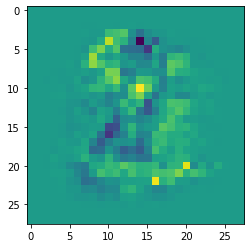

In [214]:
plt.imshow(exp)

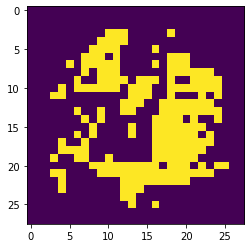

In [215]:
plt.imshow(segment(exp))

In [105]:
explanation=shap_values[0][0][0]

In [129]:
np.max(explanation),np.min(explanation), np.average(explanation)

(0.3282991647720337, -0.3031236529350281, 0.006162136259333971)

In [130]:
seg=explanation.copy()

In [131]:
seg=seg>np.average(explanation)

In [132]:
seg=np.array(seg, dtype=int)

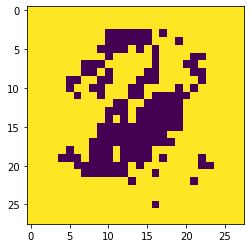

In [158]:
plt.imshow(-seg)

In [140]:
plt.savefig('explain3.png')

<Figure size 432x288 with 0 Axes>

In [143]:
plt.savefig('foo.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [159]:
import cv2

In [163]:
cv2.imwrite('cv2.png', seg)

True

In [166]:
sego=cv2.imread('cv2.png', cv2.IMREAD_GRAYSCALE)

In [167]:
sego.shape

(28, 28)

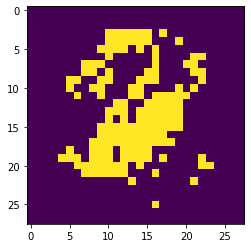

In [168]:
plt.imshow(sego)

In [148]:
from PIL import Image

In [150]:
seg=seg*255

In [154]:
np.max(seg)

255

In [156]:
plt.savefig('here.png')

<Figure size 432x288 with 0 Axes>

In [157]:
seg.shape

(28, 28)

In [122]:
s=np.array([[1, 2],
       [3, 4]])

In [123]:
s=s>2

In [124]:
s

array([[False, False],
       [ True,  True]])

In [125]:
np.array(s, dtype=int)

array([[0, 0],
       [1, 1]])

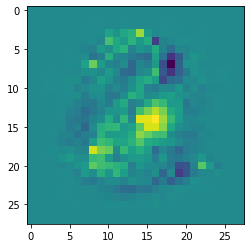

In [142]:
plt.imshow(shap_values[0][0][0])

In [169]:
cv2.imwrite('exp21.png', shap_values[0][0][0])

True

In [ ]:
# shap_values=np.array(shap_values)[:,0,:,:]

In [ ]:
shap.image_plot(shap_values, -(some))

In [ ]:
sample_images[0].shape

In [ ]:
samples=test.dataset.x[:4]
samples.shape

In [ ]:
shap_values = explainer.shap_values(np.array(samples))

In [ ]:
shap_values[9].shape

In [ ]:
samples=np.array(samples)

In [ ]:
samples.shape

In [ ]:
samples.shape

In [ ]:
samples2=np.array([i.reshape(28,28) for i in samples])    

In [ ]:
samples2[0].shape

In [ ]:
shap_values[0].shape

In [ ]:
shap_values_2=np.array(np.array([i.reshape(28,28) for i in shap_values]))

In [ ]:
eski.shape,samples2.shape

In [ ]:
shap.image_plot(eski, -samples2)

In [ ]:
type(shap_values)

In [ ]:
shap_values[0].shape

In [ ]:
shap_values[0][0].shape

In [ ]:
shap_values[0][0][0].shape

In [ ]:
eski=np.array(shap_values)[:,:,0,:]

In [ ]:
eski[0].shape

In [ ]:
plt.imshow(eski[0][0])

In [ ]:
predicted=[]
for image,label in zip(images,labels):
    predicted.append(get_label(image))    

In [ ]:
samples=images[:10]

In [ ]:
samples.shape

In [ ]:
def plot_samples(samples):
    _, axs = plt.subplots(1,5, figsize=(12, 12))
    
    axs = axs.flatten()
    
    for img, ax in zip(samples, axs):
        
        ax.imshow(img.reshape(28,28))
        ax.set_title("Predicted :"+ str(check(img)))
    plt.show()